# Advanced House Prices 
In this notebook we're going through a machine learning project with the goal of predicting the sale prices of homes.

These are the steps that we're going to follow :

## 1. Problem Definition 

> How well can we predict the future sale price of houses given all the parameters and previous examples of how much similar houses have been sold for ?

## 2. Data 

The data used is downloaded from kaggle House Prices Compition. The link for the same is provided below .
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

There are 2 main data sets :

* Train.csv - Training data set 
* Test.csv - Test data set 


## 3. Evaluation 

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 

For more on the evaluation of this project check:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

**Note** : The goal for most Regression Evaluation Metrix is to minimize the error. For example : Our goal for this project is to create a machine Learning model which will minimize RMSE.

## 4. Features 

kaggle provides a data dictionary detailing all the features of the data set. Or you can view the data on google sheets.
https://docs.google.com/spreadsheets/d/1O4_Dq1nLH439dnlxnXool7MCXKDENEoxo2wpPMLLd4g/edit?usp=sharing


In [107]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
from scipy.stats import norm

In [108]:
#### Importing data 
df = pd.read_csv("train.csv")

In [109]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [111]:
# checking our data for missing values 
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Exploratory Data Analysis (EDA)
Lets Visualise some columns that stands out to us and find what relation they shares with our dependent variable. a.k.a Sales Price.


**Year of built Vs Sales Price**

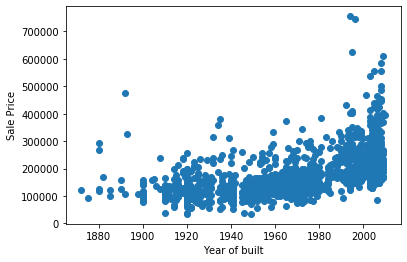

In [112]:
fig,ax = plt.subplots()
ax.scatter(df["YearBuilt"],df["SalePrice"])
plt.xlabel("Year of built")
plt.ylabel("Sale Price");

we can infer from above that prices for newly built houses is much more than houses which have been around for quite a while .


**Over all quality of the house vs Sale Price**



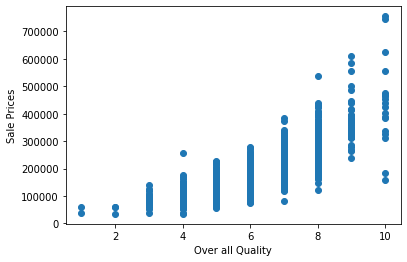

In [113]:
fig,ax = plt.subplots()
ax.scatter(df["OverallQual"],df["SalePrice"])
plt.xlabel("Over all Quality")
plt.ylabel("Sale Prices");

OverallQual: Rates the overall material and finish of the house

  * 10-	Very Excellent
  * 9	Excellent
  * 8	Very Good
  * 7	Good
  * 6	Above Average
  * 5	Average
  * 4	Below Average
  * 3	Fair
  * 2	Poor
  * 1	Very Poor
	
 **Above ground living area square ft. vs Sale Price**

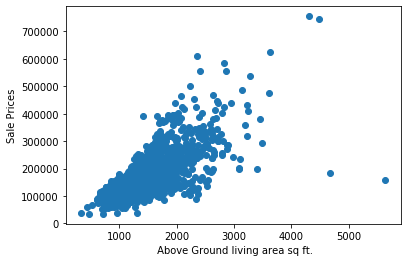

In [114]:
fig,ax = plt.subplots()
ax.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel(" Above Ground living area sq ft.")
plt.ylabel("Sale Prices");

Here we can notice rather an exponential relationship between the columns of consideration rather than a linear relationship. We also notice that there are some outliers present  on the top and bottom right . The top right seems to be following a trend , we'll keep them whereas the bottom right is not .

**Total basement sq ft. vs Sale Price**

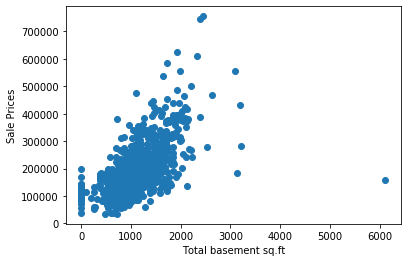

In [115]:
fig,ax = plt.subplots()
ax.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.xlabel("Total basement sq.ft")
plt.ylabel("Sale Prices");

Now this plot between total basement square ft. and Sale price also has an outlier. But this doesnt seem to be following any trend hence it can hinder with our calculations .

Now let us visualise our target variable a.k.a Sale Price with a histogram .

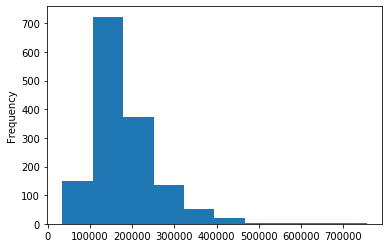

In [116]:
df["SalePrice"].plot(kind="hist");

we see that this histogram represents the curve of a standard normal distribution, lets make this plot a litte prettier using seaborn .

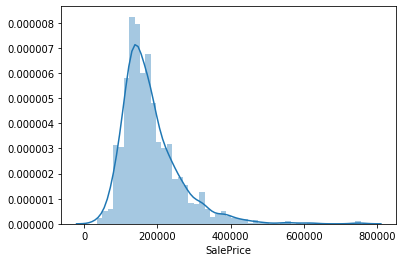

In [117]:
sns.distplot(df["SalePrice"]);

Until now we just followed our intuition and analysed what we thought was important but it is important to find out how each independent variable is related to the other and also how it is related to the dependent variable. Therefore we'll plot a correlation matrix and visualise the same using seaborn's heatmap.

In [118]:
# correlation matrix 
corr_mat=df.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


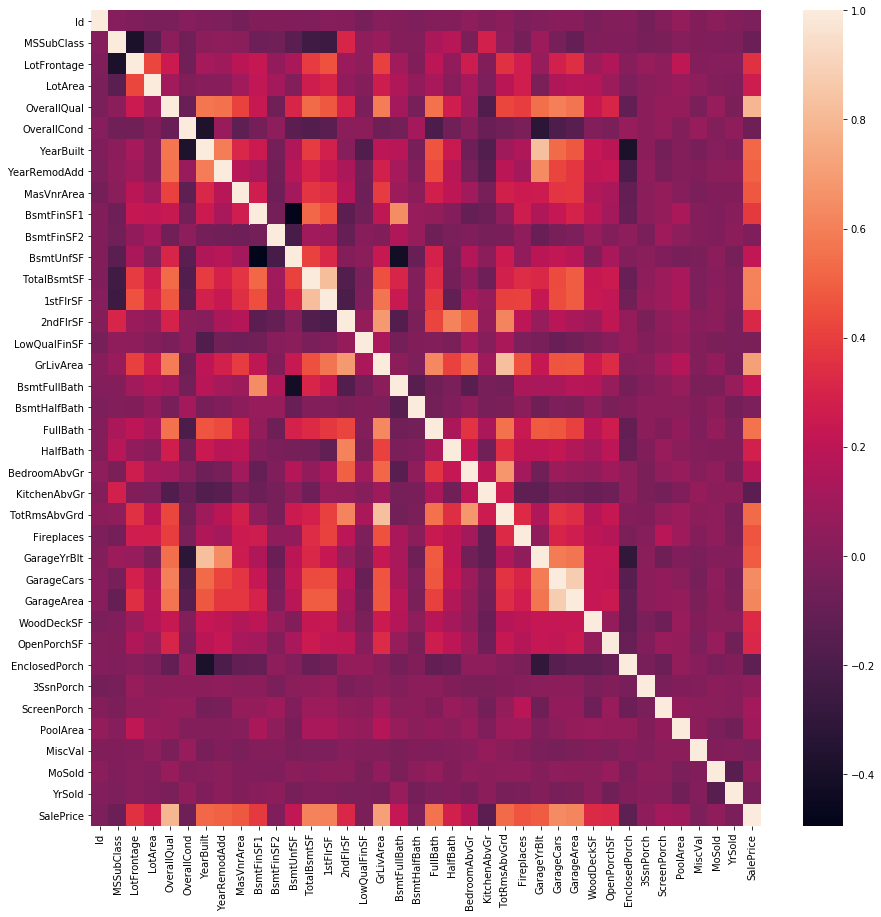

In [119]:
# lets visualise this a little better by plotting it .
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat,
            annot=False);

Heatmaps are a great way to visualise correlations between variables in my opinion. We notice here that as the grids get lighter in colour they indicate positive correlation with our target variable and the grids which are dark represent negative correlation with our target variable. a.k.a Sale Price.

Positive Correlation - positive correlation between two variable suggests that as the independent variable increases our target variable also increases.

Negative Correlation - negative correlation suggests that as our independent variable decreases our target variable increases. 

### Outliers

Lets look at the scatter plots of basement sq ft. and above ground living area sq ft.

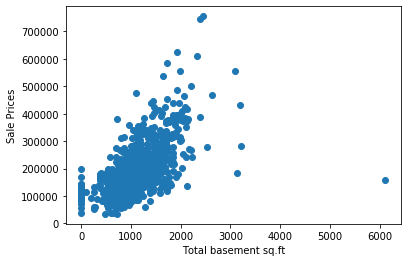

In [120]:
# Basement area square ft
fig,ax = plt.subplots()
ax.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.xlabel("Total basement sq.ft")
plt.ylabel("Sale Prices");

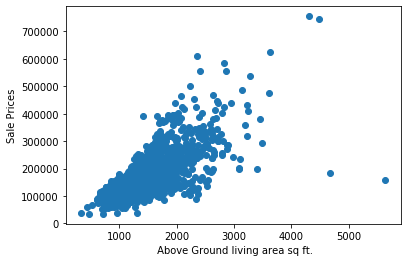

In [121]:
# above ground living area 
fig,ax = plt.subplots()
ax.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel(" Above Ground living area sq ft.")
plt.ylabel("Sale Prices");

As mentioned above , in case of Above Ground Living Area sq ft, we'll keep the top right outliars as they seem to be following a trend and delete the bottom right ones . 
whereas incase of total basement sq ft , there is only one outliar which seems to be the problem so we'll delete that as well . 

In [122]:
# deleting points 
df.sort_values(by="GrLivArea", ascending=False)[:2]
df = df.drop(df[df["Id"]==1299].index)
df = df.drop(df[df["Id"]==524].index)

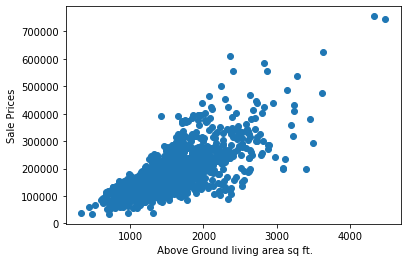

In [123]:
#plotting the graph again 
fig,ax = plt.subplots()
ax.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlabel(" Above Ground living area sq ft.")
plt.ylabel("Sale Prices");

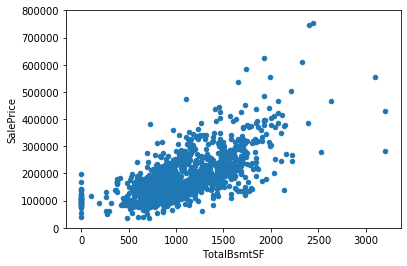

In [124]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


## Let us understand our target variable better !

We already did some data cleaning and found out a lot about sale price. but lets dive a little deeper .

Whenever we talk about multivariate analysis, these four assumptions should be tested with the target variable :
1. normality :
When we talk about normality, we mean that the data should look like a normal distribution . If we solve normality, we solve other problems like Heterodacity . Here i will check only univariate normality(Sale Price) for simplicity. 

2. Homoscedacity:
It is the assumption that the dependent variable exhibits equal level of variance across a range of predictor variables.Homoscedacity is desirable because we want all our predector variables to have the same error variance .

3. Linearity :
Easiest way to check for linearity between variables is to check their scatter plots . We wont get into this as most of the scatter plots that we've seen seem to be linearly related . 

4. Abscence of correlated errors :
Correlated errors as the name suggests happens when one error is correlate to the other . For example, if we find an error being made systematically, it means that there's a relationship between the variables . This often happens in time series data where variables are often time related. we wont get into this either .


**Terminologies to understand**

**Skewness**: It is a measure of lack of symmetry . A data set is symmetric if it looks the same to left and right of the center point .

**Kurtosis** : It is a measure of whether a data is heavy tailed (more number of outliers) or light-tailed( less number of outliers) with respect to a normal distribution . In ideal case, a normal distribution will have zero outliers .

### Normality



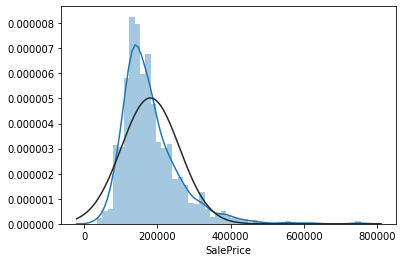

In [125]:
# plotting a histogram for sale price 
sns.distplot(df["SalePrice"],fit = norm);


Here we see that sale price is not normal . It shows positive skewness. We can fit it better in the normal distribution curve by taking a log of this.


In [126]:
df["SalePrice"]= np.log(df["SalePrice"])

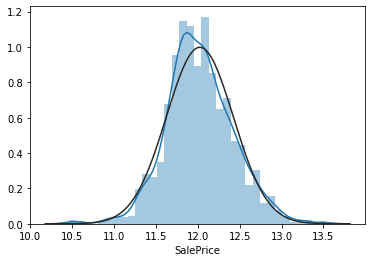

In [127]:
sns.distplot(df["SalePrice"],fit = norm);

And vola! we did it. similarly lets check this with "GrLivArea" and "TotalBsmtSF"

#### checking for GrLivArea

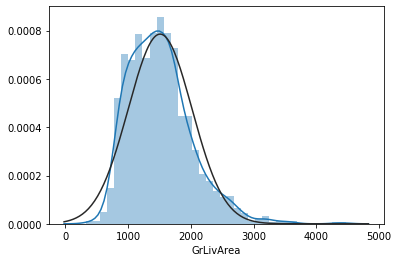

In [128]:
sns.distplot(df["GrLivArea"],fit=norm);

lets see if we can make this better by log transformation 

In [129]:
df["GrLivArea"] = np.log(df["GrLivArea"])

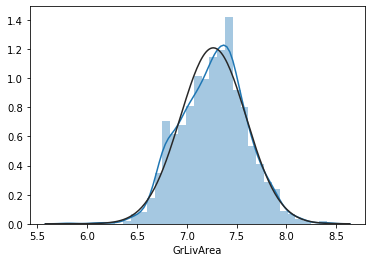

In [130]:
sns.distplot(df["GrLivArea"],fit=norm);

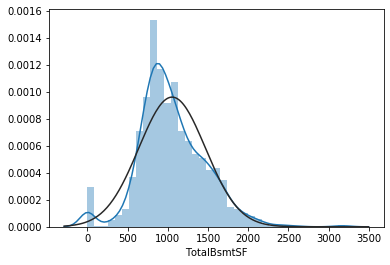

In [131]:
# histogram for TotalBsmtSF
sns.distplot(df["TotalBsmtSF"],fit=norm);

Here we have 3 problems to tackle :
1. skewness of the plot 
2. A lot of observations are with value zero. That is many people who live without a basement . 
3. Because of the value zero , we wont be able to perform log transformations .

To solve this we'll create a variable that can take the effect of having or not having a basement. Then we,ll do a log transformation on all the non-zero values . This way we can transform the data without losing the effect of having or not having the basement. 

In [132]:
# create a column for new variable. (binary categorical feature.)
# for area>0 it gets 1 and for area==0 it gets 0.
df["HasBsmt"]=pd.Series(len(df["TotalBsmtSF"]),index=df.index)
df["HasBsmt"]=0
df.loc[df["TotalBsmtSF"]>0, "HasBsmt"]=1 

In [133]:
#transform data 
df.loc[df["HasBsmt"]==1,"TotalBsmtSF"]=np.log(df["TotalBsmtSF"])

C:\Users\prart\Desktop\bulldozer-project\env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


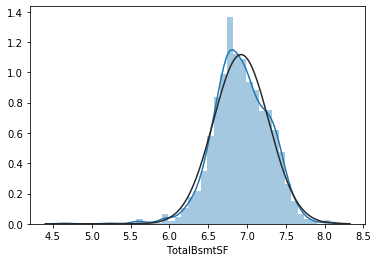

In [134]:
# creating a histogram 
sns.distplot(df[df["TotalBsmtSF"]>0]["TotalBsmtSF"],fit=norm);

### Homoscedacity

The best way to check for Homoscedacity is graphically .
when plots (like scatter plots )show a cone or a diamond like figure , they usually indicate heteroscedacity. Scroll on top and check the scatter plots between GrLivArea vs SalePrice and TotalBsmtSF vs SalePrice. 

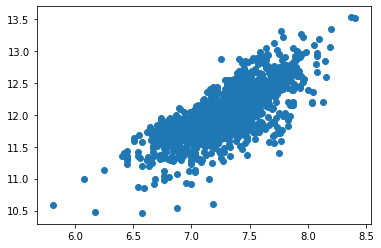

In [135]:
plt.scatter(df["GrLivArea"],df["SalePrice"]);

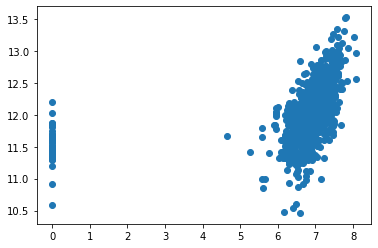

In [136]:
plt.scatter(df["TotalBsmtSF"],df["SalePrice"]);

And here we see the power o normalising the data . The cone shape of the scatter plots are gone and now we can dive into filling the missing values of our data and modelling !

## convert strings to categories 
one way we can convert all our data into numeric data is by converting them into pandas categories

we can check different data types compatible with Pandas here : https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [137]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216,1


In [138]:
# Find the Columns which contain strings 
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [139]:
# This will turn all the string values into category values 
for label , content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]= content.astype("category").cat.as_ordered()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1458 non-null   int64   
 1   MSSubClass     1458 non-null   int64   
 2   MSZoning       1458 non-null   category
 3   LotFrontage    1199 non-null   float64 
 4   LotArea        1458 non-null   int64   
 5   Street         1458 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1458 non-null   category
 8   LandContour    1458 non-null   category
 9   Utilities      1458 non-null   category
 10  LotConfig      1458 non-null   category
 11  LandSlope      1458 non-null   category
 12  Neighborhood   1458 non-null   category
 13  Condition1     1458 non-null   category
 14  Condition2     1458 non-null   category
 15  BldgType       1458 non-null   category
 16  HouseStyle     1458 non-null   category
 17  OverallQual    1458 non-null   in

We converted all of our string data types to category data types as we cannot pass strings to a machine learning model . We want it to be all numeric .

In [141]:
df.Neighborhood.cat.categories
# under the hood , pandas is treating them like numbers .

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

All of our data is now numerical, but we still have a bunch of missing data !!

In [142]:
df.isnull().sum()/len(df)
# percentage of missing values 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177641
LotArea          0.000000
                   ...   
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
HasBsmt          0.000000
Length: 82, dtype: float64

### Fill Missing Values 

**Fill Numeric Missing Values First**

In [143]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
HasBsmt


In [144]:
# check for which numeric columns have null values 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [145]:
# fill the numeric rows with the median 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not 
            df[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric value with median 
            df[label]=content.fillna(content.median())

In [146]:
# check if there's any null numeric value 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Prints out nothing because we just filled all the numeric columns with the median 

### Filling and turning categorical variables into numbers 

In [147]:
# check for columns which aren't numeric 
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [148]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        # add a binary column which tells us if the data was missing or not 
        df[label+"_is_missing"] = pd.isnull(content)
        # turn categories into numbers and add 1
        df[label]= pd.Categorical(content).codes+1

In [149]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [150]:
df.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 128, dtype: int64

Now that all of our data is numeric and our Dataframe has no missing values , we should be able to build a machine learning model on it 

## 5. Modelling 

In [151]:
len(df)

1458

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [153]:
# instantiate our model 
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)
model.fit(df.drop("SalePrice",axis=1),df["SalePrice"])


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [154]:
model.score(df.drop("SalePrice",axis=1),df["SalePrice"])

0.9833970235836861

**Question** : Why doesn't the above metric hold water ? why isnt it reliable ?

### splitting the data into train and validation data sets 

In [155]:
# splitting the Data into x & y 
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

# splitting the data 

x_train,x_valid,y_train,y_valid=train_test_split(x,
                                                 y, 
                                                 test_size=.02)

In [156]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [157]:
model.score(x_valid,y_valid)

0.7938991373575821

Okay, so what i did here was that i realised that i cannot score my data on the same set that i trained it on. so i imported the train test split from sklearn and converted the test data into validation data for our perusal. 

**note** We should generally split the data set before filling the missing values but for this project we'll let this be .

## Building an Evaluation Function 

In [158]:
# build an evaluation function (the competition uses RMSE)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def rmse(y_true,y_preds):
    """
    Calculates Root Mean Squared Error between the actual and the predicted labels.
    
    """
    return np.sqrt(mean_squared_error(y_true,y_preds))

## create a function to evaluate models on a few different levels 

def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RMSE":rmse(y_train,train_preds),
              "Valid RMSE":rmse(y_valid,val_preds),
              "Training r^2":r2_score(y_train,train_preds),
              "Valid r^2":r2_score(y_valid,val_preds)}
    return scores 

In [159]:
len(x_train)

1428

In [160]:
show_scores(model)

{'Training MAE': 0.034975693355427065,
 'Valid MAE': 0.09440562831891418,
 'Training RMSE': 0.0510838056670169,
 'Valid RMSE': 0.1406241053294594,
 'Training r^2': 0.9837641705406263,
 'Valid r^2': 0.7938991373575813}

## Hyperparameter tuning with RandomizedSearchCV

In [161]:
from sklearn.model_selection import RandomizedSearchCV
# different RandomForestRegressor Hyperparameters 
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"]}

#Instantiate RandomizedSearchCV model 
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
# i only did 2 for this case, if you have more time or computing power in your laptop, set it to a higher value ex(100).
                            cv=5,
                            verbose=True)
#fit the RandomizedSearchCV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [162]:
# Search for the best Hyperparameters 
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [163]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)


{'Training MAE': 0.06290779694601496,
 'Valid MAE': 0.09949066224395278,
 'Training RMSE': 0.09479378144304461,
 'Valid RMSE': 0.14282189671048795,
 'Training r^2': 0.9440928068253353,
 'Valid r^2': 0.7874065609947467}

**Note** As we see that our score has worsened , but that's okay because we ran this code for only 2 iterations , if we do it for a 100 iterations , we'll find better hyperparameters .

for now , we'll just stick to our original model 

## Feature Importance 
Feature importance seeks to figure out different attributes of the data were most important when it comes to Predicting the target variable . a.k.a Sale Price 

In [184]:
model.feature_importances_


array([4.10657646e-03, 2.21513987e-03, 7.93781986e-03, 5.95667296e-03,
       1.39524635e-02, 8.88480618e-05, 5.44177963e-04, 1.40685923e-03,
       9.05508491e-04, 9.52663602e-06, 7.07813229e-04, 6.99519123e-04,
       4.38807330e-03, 7.54660641e-04, 7.05447223e-05, 5.79642116e-04,
       9.96651075e-04, 5.51053313e-01, 1.14533691e-02, 1.57371992e-02,
       1.08020653e-02, 8.89304946e-04, 5.79522402e-05, 1.66261490e-03,
       1.65888969e-03, 6.55184920e-04, 3.05042969e-03, 1.73164418e-03,
       1.40997789e-03, 6.40584196e-04, 2.10814375e-03, 1.04406844e-03,
       8.35244148e-04, 1.34558771e-03, 2.13793249e-02, 3.85481422e-04,
       3.78871365e-04, 5.11022793e-03, 4.17288428e-02, 2.54271775e-04,
       1.12260673e-03, 1.27090728e-02, 6.47329859e-04, 2.31134164e-02,
       4.65229342e-03, 1.42677243e-04, 1.03004433e-01, 1.12372487e-03,
       2.85779383e-04, 4.43556461e-03, 1.01129009e-03, 1.61438452e-03,
       1.53299126e-03, 2.45025312e-03, 2.67018754e-03, 9.81429387e-04,
      

In [199]:
# helper function to plot feature importance 
def plot_features (columns,importances,n=20):
    df= (pd.DataFrame({"features":columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
# plot the data frame we created .
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance")
    ax.invert_yaxis()

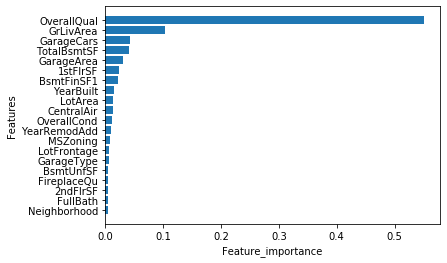

In [200]:
plot_features(x_train.columns,model.feature_importances_)

Here we've seen that people prefer over all quality a lot more than other parameters . hence it contributes a lot more to the sale price column than other parameters . 